# Project 04 - Identify Fraud from Enron Email

##### Student Tags

Author: Anderson Hitoshi Uyekita    
Project: Identify Fraud from Enron Email    
Course: Data Science - Foundations II  
COD: ND111  
Date: 28/01/2019    
Version: 1.0

***

# Synopsis






***

## Table of Contents
- [1. Introduction](#intro)
- [2. Data Wrangling](#wrangling)
    - [2.1. Data Gathering](#gathering)
    - [2.2. Data Assessing](#assessing)
        - [**Task 1** - Feature List](#task1)
    - [2.3. Data Cleaning](#cleaning)
        - [**Task 2** - Removing Outliers](#task2)    
    - [2.4. Exporing to JSON](#exporting)
- [3. Exploratory Data Analysis](#eda)
    - [3.1. Tableau Public](#story)
    - [3.2. Feature Engineering](#feature_engineering)
        - [**Task 3** - Creating new features](#task3)    
    - [3.3. Feature Scaling](#scaling)
    - [3.4. Feature Selection](#selection)
        - [**Task 4** - Try a varity of classifiers](#task4)    
    - [3.5. Dimension Reduce](#pca)        
- [4. Predicting](#ml)
- [5. Conclusions](#conclusions)
- [6. Questions](#questions)
- [References](#references)
- [Appendix](#appendix)
    - [Given code](#code)



***

# 1. Introduction <a id='intro'></a>

I have decided to use the Jupyter Notebook due to several reasons:

* Record the data manipulation;
* Data Wrangling;
* Data Visualization, and;
* Perform a Reproducible Research.

The original file (`poi_id.py`) was used in several pieces spread all over this document.

### 1.1. Reproducibility

I have written this report using the Jupyter Notebook, which would allow anyone to reproduce this document in a local computer. I have made a great effort to document every step to turn this document understandable.

#### Work envinronment

I have performed this project using:

* Dell Notebook Inspiron 7348;
* Intel(R) Core(TM) i7-5500U CPU @ 2.40GHz 2.40GHz;
* 8.00 GB, and;
* Windows 10 Pro 64-bits.

#### Softwares

This report has written using four software:

* Python (version 2.7.15);
* Jupyter Notebook (version 5.6.0);
* Tableau Desktop Public (version 2018.3.2 - 20183.18.1219.1533 - 64-bits);
* Opera (version 58.0.3135.47), and;
* Atom (version 1.34.1 ia32).

I have used the Atom to push to Github repository and to visualize some files, and nothing more than this.

#### Packages

I kindly ask you to install each of this packages before you run the next steps.

* pandas (version 0.23.4);
* numpy (version 1.16.0);

This list of packages and version was generate by the [version_information][version_information_github] package.

[version_information_github]: https://github.com/jrjohansson/version_information

#### Repository

You can access all files of this report in this repository:

* https://github.com/AndersonUyekita/ND111_data_science_foundations_02

#### Path

I have written this report inside of the `ud120-projects/final_project` folder.

### 1.2. Modifications

I have changed all instances of `cross_validation` to `model_selection`.

* `tester.py`, and;
* `poi_id.py`.

I have opted to change the original code because I did not downgraded my Scikit Learn.


### 1.3. Importing Libraries

For this project I will use some libraries to manage data frames, download file, Twitter API Client code, etc.. Let's import this packages to the Jupyter Notebook environment.

In [1]:
import pandas as pd

import numpy as np

import sklearn

import sys

import pickle

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

from sklearn.naive_bayes import GaussianNB

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

import json

from time import time

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing the K Nearest Neighbors from Scikit learn package.
from sklearn.neighbors import KNeighborsClassifier

# Importing the AdaBoost from Scikit learn package.
from sklearn.ensemble import AdaBoostClassifier

# Importing the Random Forest from Scikit learn package.
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

### 1.4. Questions

Founded on the instructions, I will guide my Jupyter Notebook following the questions posed in the document hosted [here][q_link].

### 1.5. Rubric

Also following the instructions, I will keep in mind to atend all the requirement pointed out in the [rubric][rubric]  

[q_link]: https://docs.google.com/document/d/1NDgi1PrNJP7WTbfSUuRUnz8yzs5nGVTSzpO7oeNTEWA/pub?embedded=true
[rubric]: https://review.udacity.com/#!/rubrics/27/view

***

## 2. Data Wrangling  <a id='wrangling'></a>

I have divided the Data Wrangling process into three smaller steps:

* Data Gathering;
* Data Assesing, and;
* Data Cleaning.

### 2.1. Data Gathering <a id='gathering'></a>

All data from this project I was forked from the Udacity Github repository. Most part of the gathering process is already made by the instructor. For this reason, the only task I have was to load the pickle file.

In [2]:
# Task 1: Select what features you'll use.  
# features_list is a list of strings, each of which is a feature name.  
# The first feature must be "poi". 
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
# Data type.
type(data_dict)

dict

The `data_dict` is a dictionary which has all information about the POI and non-POI employee from Enron.

Fourtunately, dictionary is easy converted to Data Frame.

### 2.2. Data Assessing <a id='assessing'></a>

The first step here is to realize what kind of information this dictionary has. So let's extract the keys of this dictionary and later print the content of each key.

In [3]:
# Initialization of list.
names_key = []

# Loop to gather the keys of this dictionary.
for index in data_dict:
    names_key.append(index)

# Print the first 5 names_key from data_dict.
names_key[:5]

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P']

The keys are names.

>How many names are in this dictionary?

In [4]:
print "Number of names: ", len(names_key)

Number of names:  146


Now, I want to investigate the value associate to the first key ('METTS MARK').

In [5]:
# Value associated to the names_key.
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

As you can see, there are several variable avaiable to a further study. I will create a dataframe with all information.

In [6]:
# Converting dictionary in dataframe.
df_dict = pd.DataFrame(data_dict).transpose()

# Printing the first 5 rows.
df_dict.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


>How many variable available?

In [7]:
# Are there how many variables?
print "Variables: ", df_dict.shape[1]

Variables:  21


>How many observations available?

In [8]:
# Are there how many observations?
print "Observations: ", df_dict.shape[0]

Observations:  146


>What are the variables?

In [9]:
# All variables available to choose.
original_feat = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options',
                 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
                 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary',
                 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

# Priting all variables.
df_dict.columns.tolist()

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

These features could be divided into:


**Other:**
* POI.

**Email Features:**
* email_address;
* from_messages;
* to_messages;
* from_poi_to_this_person;
* from_this_person_to_poi, and;
* shared_receipt_with_poi.

**Financial Features:**
* bonus;
* deferral_payments;
* deferred_income;
* director_fees;
* exercised_stock_options;
* expenses;
* loan_advances;
* long_term_incentive;
* other;
* restricted_stock;
* restricted_stock_deferred;
* salary;
* total_payments, and;
* total_stock_value.

Clearly, this dataframe has a lot of NaN, and for this reason I will select additional features according to the availability.

In [10]:
# Initializing a dictionary to store the NaN proportion.
nan_proportion = dict()

# Loop to create the proportion of NaN per variable.
for index in df_dict.columns.tolist():
    nan_proportion[index] = round(100 * sum(df_dict[index] == 'NaN')/float(len(df_dict[index])), 2)
    
# Converting in pandas DataFrame.
nan_proportion = pd.DataFrame.from_dict(nan_proportion, orient='index', columns = ['NaN [%]'])

# Sorting to show the variables with less NaN in the first rows.
nan_proportion.sort_values('NaN [%]')

,NaN [%]
poi,0.00
total_stock_value,13.70
total_payments,14.38
email_address,23.97
restricted_stock,24.66
exercised_stock_options,30.14
salary,34.93
expenses,34.93
other,36.30
from_poi_to_this_person,41.10


There are some variable with a high rate of 'NaN', but this is totally acceptable because neither all employee has `director_fees`, `long_term_incentive`, etc. All definition of these variables could be found in the `enron61702insiderpay.pdf`, this document is available in the repository project (`ud120-projects/final_project`).

The definition of two main variables:

* `total_payments`, and;
* `total_stock_value`.

The `total_payments` is a summation of:

* salary;
* bonus;
* long_term_incentive;
* deferred_income;
* deferral_payments;
* loan_advances;
* others;
* expenses, and;
* director_fees.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_01.png" alt="Figure 1 - Total Payments Composition" width="80%;" />
<em>Figure 1 - Total Payment composition.
</em>
</center>


The `total_stock_value` is a summation of:

* exercised_stock_options;
* restricted_stock, and;
* retricted_stock_deferred.

Figure 1 shows a fragment of the `enron61702insiderpay.pdf` document.  

<br>
<center>
<img src="01-img/nd111_project_04_02.png" alt="Figure 2 - Total Stock Value Composition" width="40%;" />
<em>Figure 2 - Total Stock Value.
</em>
</center>

I will select `total_payments` and `total_stock_value` to be part of the `features_list`. I have some concerns about adding more features from the finance part due to a greater chance to add colinearity.

As you can see, there are 7 variables without relation with `enron61702insiderpay.pdf`.

* poi;
* email_address;
* from_poi_to_this_person;
* from_messages;
* from_this_person_to_poi;
* to_messages, and;
* shared_receipt_with_poi.

From these 7 features, I will use:

* from_poi_to_this_person;
* from_this_person_to_poi;
* shared_receipt_with_poi;
* from_messages, and;
* to_messages.

For this reason, I will update the `features_list` adding those new features.

In [11]:
# Adding the additional features.
features_list.append('total_payments')
features_list.append('total_stock_value')
features_list.append('from_poi_to_this_person')
features_list.append('from_this_person_to_poi')
features_list.append('shared_receipt_with_poi')
features_list.append('from_messages')
features_list.append('to_messages')

# Printing the new list of feature.
features_list

['poi',
 'salary',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages']

Let's have a look in the features selected plotting a straightforward scatter plot of `total_payments` and `salary`.

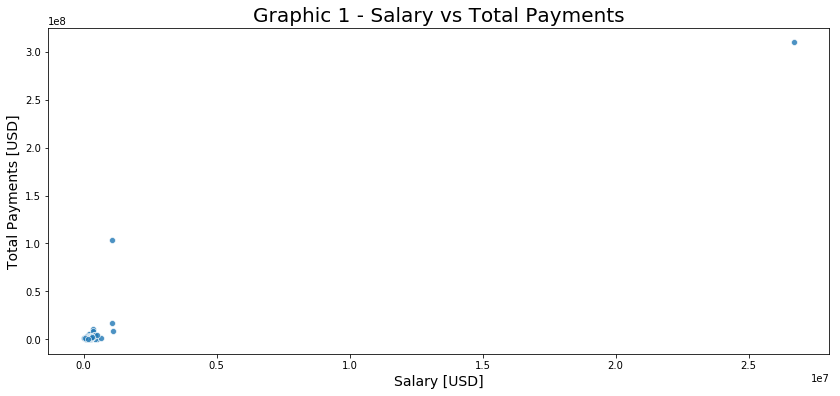

In [12]:
# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_dict.salary,           # X axis feature.
                y = df_dict.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 1 - Salary vs Total Payments', # Graphic Title.
          fontsize = 20);

Notable, there is a strange point far from the others, it is possible as outlier. Sorting the dataframe by the `salary` it is a good way to understand it.

In [13]:
# Sorting the salary, only the first 5 rows.
df_dict.query('salary != "NaN"').sort_values('salary', ascending = False)[['salary']].head()

,salary
TOTAL,26704229
SKILLING JEFFREY K,1111258
LAY KENNETH L,1072321
FREVERT MARK A,1060932
PICKERING MARK R,655037


Bear in mind, one of this observation is the `TOTAL`, which I should remove from the dataframe, because it is not an observation, it is an aggregate value.

Table 1 show the problems to be fixed in Data Cleaning.

<br><center><strong>Table 1 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information|

</center>

I will check all features from each employee to compute how many NaN are. If any the number of NaN reach 20 means that there are no information record for given employee.

In [14]:
# List to store the values of NaN for each employee. 
employee_nan = []

for index in df_dict.transpose():
    employee_nan.append([index, sum(df_dict.transpose()[index] == 'NaN')])

In [15]:
# Converting the List in DataFrame.
employee_nan = pd.DataFrame(employee_nan, columns = ['Employee','# NaN']).sort_values('# NaN', ascending = False)

# Printing the first 10 rows.
employee_nan.head(10)

,Employee,# NaN
84,LOCKHART EUGENE E,20
138,WHALEY DAVID A,18
56,GRAMM WENDY L,18
127,THE TRAVEL AGENCY IN THE PARK,18
143,WROBEL BRUCE,18
53,GILLIS JOHN,17
142,WODRASKA JOHN,17
25,CLINE KENNETH W,17
133,WAKEHAM JOHN,17
114,SAVAGE FRANK,17


Without no doubt the employee `LOCKHART EUGENE E` do not have any information.

In [16]:
# Printing the info from LOCKHART EUGENE E.
df_dict.loc[['LOCKHART EUGENE E']]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Probably the `THE TRAVEL AGENCY IN THE PARK` is not a employee, and for this reason I also will remove it.

There are some employees, which needs some further investigation as you can see in the query below.

In [17]:
# Employees without salary and total_stock_value.
df_dict.loc[employee_nan.Employee[:10].tolist()].query('salary == "NaN"').query('total_stock_value == "NaN"')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,119292,NaN
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,362096,False,NaN,NaN,NaN,NaN,NaN,362096,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WAKEHAM JOHN,NaN,NaN,NaN,109298,NaN,NaN,103773,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,213071,NaN
SAVAGE FRANK,NaN,NaN,-121284,125034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,3750,NaN


I do not have any strong reason to remove them, although the most information is NaN I can not discard it.

Table 2 shows all the issues I have found in the dataset.

<br><center><strong>Table 2 - Table of Issues.</strong>

|Issue ID|Issue Type|Dimension|Method|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Validity|Visual|Remove the `TOTAL` observation because it is a aggregate information.|
|2|Quality|Validity|Programmatic|Remove the `LOCKHART EUGENE E` observation because it only have NaN.|
|3|Quality|Validity|Programmatic|Remove the `THE TRAVEL AGENCY IN THE PARK` observation because it is not a employee.|

</center>

### 2.3. Data Cleaning <a id='cleaning'></a>

Fortunately, there is only one problem pointed out in the Data Assessing.

#### Issue ID 1

>**Issue:** Remove the observation TOTAL.

**Define**

* Remove from the `data_dict` the key `TOTAL`.

**Code**

In [18]:
# Copying the original dictionary.
data_dict_clean = data_dict.copy()

# Removing the key TOTAL.
data_dict_clean.pop('TOTAL');

**Test**

Visualy I can assure the `TOTAL` removal plotting the `salary` by `total_payments`.

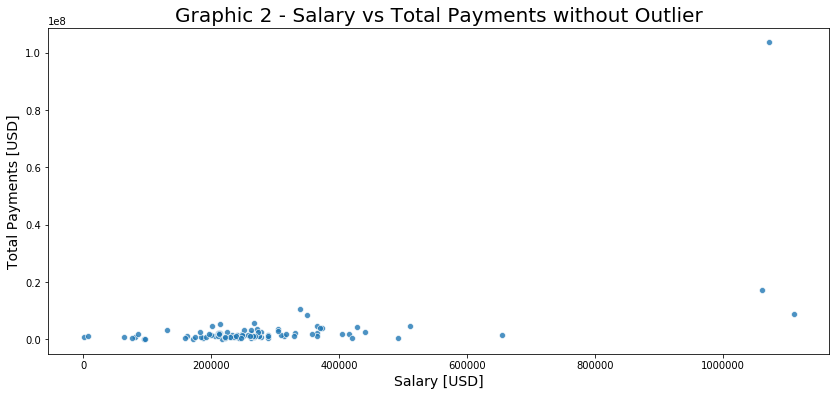

In [19]:
# Creating a dataframe to be used to plot the graphic. This is a temporaly variable.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Visualizing the data.

plt.figure(figsize = [14,6]);                 # Defining the figure size.
sns.scatterplot(x = df_clean.salary,           # X axis feature.
                y = df_clean.total_payments,   # Y axis feature.
                alpha = 0.8);                 # Points transparency.
plt.xlabel('Salary [USD]',                    # X axis label.
           fontsize = 14);                    
plt.ylabel('Total Payments [USD]',            # X axis label.
           fontsize = 14);
plt.title('Graphic 2 - Salary vs Total Payments without Outlier', # Graphic Title.
          fontsize = 20);

Programmaticly I can confirm the exclusion of the `TOTAL` checking the existency in the index.

In [20]:
# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'TOTAL') # 0: removed; 1: Not removed

0

#### Issue ID 2

>**Issue:** Remove the observation LOCKHART EUGENE E.

**Define**

* Remove from the `data_dict` the key `LOCKHART EUGENE E`.

**Code**

In [21]:
# Removing the key LOCKHART EUGENE E.
data_dict_clean.pop('LOCKHART EUGENE E');

**Test**

In [22]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'LOCKHART EUGENE E') # 0: removed; 1: Not removed

0

#### Issue ID 3

>**Issue:** Remove the observation THE TRAVEL AGENCY IN THE PARK.

**Define**

* Remove from the `data_dict` the key `THE TRAVEL AGENCY IN THE PARK`.

**Code**

In [23]:
# Removing the key THE TRAVEL AGENCY IN THE PARK.
data_dict_clean.pop('THE TRAVEL AGENCY IN THE PARK');

**Test**

In [24]:
# Temporaly variable only to justify this test.
df_clean = pd.DataFrame(data_dict_clean).transpose()

# Confirming the exclusion of TOTAL from the dataframe.
sum(df_clean.index == 'THE TRAVEL AGENCY IN THE PARK') # 0: removed; 1: Not removed

0

#### Checking Dataframe

Lastly, I have removed 3 keys due to different reasons.

Initially, the dataframe had 146 observations and I expect 143 after the cleaning process.

In [25]:
# Number of valid observations. 
print "Number of observations: ", df_clean.shape[0]

Number of observations:  143


### Task 2 - Removing Outliers <a id='task2'></a>

>**Remove outliers**

I have removed the `TOTAL` observation because it is a aggregation. The reason to keep the extreme values from LAY KENNETH L, LAVORATO JOHN J, SKILLING JEFFREY K, and other are due to removing I them I will lose information, and it still valid points.

I also have removed `LOCKHART EUGENE E` and `THE TRAVEL AGENCY IN THE PARK` because they were not good observations and only will insert noise. The latter has only NaN and the former is not a employee.

### 2.4. Exporting to JSON <a id='exporting'></a>

I have decided to export the `data_dict_clean` dictionary to a JSON file to use it in the [Tableau Public][tableau_public_url].

[tableau_public_url]: https://public.tableau.com/en-us/s/

In [26]:
# Copying
df_export = df_clean.copy()

# Converting features to float. 
df_export.deferral_payments = df_clean.deferral_payments.astype(float)
df_export.deferred_income = df_clean.deferred_income.astype(float)
df_export.director_fees = df_clean.director_fees.astype(float)
df_export.exercised_stock_options = df_clean.exercised_stock_options.astype(float)
df_export.loan_advances= df_clean.loan_advances.astype(float)
df_export.long_term_incentive= df_clean.long_term_incentive.astype(float)
df_export.restricted_stock_deferred= df_clean.restricted_stock_deferred.astype(float)

# Adding an extra columns with names.
df_export['name'] = df_export.index

# Creating a dictionary.
dict_export = df_export.to_json(orient='records')

# Writing the df_dict_clean.json in the root folder.
with open('df_dict_clean.json', mode = 'w') as file:
    file.write(dict_export)

***

## 3. Exploratory Data Analysis  <a id='eda'></a>

In consonance with the Part 6 Data Visualisation of this course, I will perform the EDA using the [Tableau Public][tableau_public_url], although this is not a requirement I will push myself to use this project as an opportunity put it in pratice.

[tableau_public_url]: https://public.tableau.com/en-us/s/

The file `df_dict_clean.json` exported in [2.4. Exporting to JSON](#exporting) was used as input of Tableau Public.

### 3.1. Tableau Public <a id='story'></a>

I have created a Story to explain the EDA process.

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1548537594428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nd111_project_04&#47;EDA' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;nd&#47;nd111_project_04&#47;EDA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548537594428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.2. Feature Engineering <a id='feature_engineering'></a>

Founded on the principle of create new features to enhance the model, I will create 4 features:

* **ratio_to_from:**

$$\text{ratio_to_from} = \frac{\text{to_messages}}{\text{from_messages}} \tag{1}$$

* **ratio_from_poi:**

$$\text{ratio_from_poi} = \frac{\text{from_poi_to_this_person}}{\text{from_messages}} \tag{2}$$

* **ratio_to_poi:**

$$\text{ratio_to_poi} = \frac{\text{from_this_person_to_poi}}{\text{to_messages}} \tag{3}$$

* **ratio_from_poi_share:**

$$\text{ratio_from_poi_share} = \frac{\text{shared_receipt_with_poi}}{\text{from_messages}} \tag{4}$$

Later in Feature Selection item, I will analise each of these new features, if it is relevant to the model I will use it, if not I just need to drop out. 

In [28]:
# Copying the df_clean, because I need a backup.
df_eda = df_clean.copy()

In [29]:
# Defining a function to create the feature engineering.
def feature_engineering(df, ratio_name, variable_numerator, variable_denominator):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function creates the ratio between two variables and store to a dataframe.               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to insert the new ratio.                                                        |
    |                                                                                                  |
    |    ratio_name: Ratio's name.                                                                     |
    |                                                                                                  |
    |    variable_numerator: The feature to be divided by the numerator.                               |
    |                                                                                                  |
    |    variable_denominator: The feature to divide the denominator.                                  |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the ratio stored as a new column.                                          |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly variable.
    temp = []
    
    # Loop to create the ratio.
    for num,den in zip(variable_numerator, variable_denominator):
        # For each value will analise if is a NaN or not.
        if den == 0:
            temp.append(0.)
        elif (num != 'NaN') & (den != 'NaN'):
            temp.append(num/float(den))
        else:
            temp.append(0.)

    # Adding the new column.
    df[str(ratio_name)] = temp
    
    return df

### Task 3 - Creating new features <a id='task3'></a>

>**Create new feature(s)**

Based on equations (1), (2), (3) and (4) and using the function `feature_engineering`, I will add to the dataset three new features.

In [30]:
# Adding the ratio_from_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi',
                    variable_numerator = df_eda.from_poi_to_this_person,
                    variable_denominator = df_eda.from_messages);

In [31]:
# Adding the ratio_to_poi.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_poi',
                    variable_numerator = df_eda.from_this_person_to_poi,
                    variable_denominator = df_eda.to_messages);

In [32]:
# Adding the ratio_to_from.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_to_from',
                    variable_numerator = df_eda.to_messages,
                    variable_denominator = df_eda.from_messages);

In [33]:
# Adding the ratio_from_poi_share.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_from_poi_share',
                    variable_numerator = df_eda.shared_receipt_with_poi,
                    variable_denominator = df_eda.from_messages);

In [34]:
# Adding the ratio_from_poi_share.
feature_engineering(df = df_eda,
                    ratio_name = 'ratio_salary_total_payments',
                    variable_numerator = df_eda.salary,
                    variable_denominator = df_eda.total_payments);

I have created 5 news features.

* ratio_from_poi;
* ratio_to_poi;
* ratio_to_from;
* ratio_from_poi_share, and;
* ratio_salary_total_payments

In [35]:
# Storing the list of engineered features.
engineered_features = ['ratio_from_poi', 'ratio_to_poi', 'ratio_to_from', 'ratio_from_poi_share', 'ratio_salary_total_payments']

### Task 1 - Feature List <a id='task1'></a>

>**Select what features you'll use.**

In [36]:
features_list

['poi',
 'salary',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages']

In [37]:
# Printing some features from df_clean. First 10 rows.
df_eda[['to_messages','from_messages','shared_receipt_with_poi','ratio_from_poi','ratio_to_poi','ratio_to_from','ratio_from_poi_share']].head(10)

,to_messages,from_messages,shared_receipt_with_poi,ratio_from_poi,ratio_to_poi,ratio_to_from,ratio_from_poi_share
ALLEN PHILLIP K,2902,2195,1407,0.021412,0.022398,1.322096,0.641002
BADUM JAMES P,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BANNANTINE JAMES M,566,29,465,1.344828,0.000000,19.517241,16.034483
BAXTER JOHN C,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAY FRANKLIN R,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BAZELIDES PHILIP J,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BECK SALLY W,7315,4343,2639,0.033157,0.052768,1.684320,0.607644
BELDEN TIMOTHY N,7991,484,5521,0.471074,0.013515,16.510331,11.407025
BELFER ROBERT,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
BERBERIAN DAVID,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000


I have noticed the necessity to convert the NaN value to zero. There are two kinds of NaN:

* Strings NaN, and;
* Float NaN.

The function `str_nan_to_0` will deal with the string one.

In [38]:
def str_nan_to_0(df, variable):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function converts the string NaN to zero.                                                |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe to perform the conversion.                                                      |
    |                                                                                                  |
    |    variable: The columns name to be converted.                                                   |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    df: Dataframe with the converted columns.                                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Temporaly list
    temp = []

    # When the NaN is a string.
    # Loop to fix the NaN values.
    for index in df[variable]:
        if index == 'NaN':
            temp.append(0)
        else:
            temp.append(float(index))
            
    # Updatind the columns with NaN with list with 0.
    df[variable] = temp
    
    return df

Let's convert all the NaN to zero.

In [39]:
# Loop to convert all columns from df_eda.
for index in df_eda:
    # These two features do not need this conversion.
    if index in ['email_address']:
        continue
    else:
        # Convert String NaN to 0.
        str_nan_to_0(df = df_eda, variable = index);
        
        # Convert float NaN to 0.
        df_eda[index] = df_eda[index].fillna(0)

In [40]:
# Saving the dataset in dictionary type.
dict_eda = df_eda.to_dict(orient = 'index')

### 3.3. `featureFormat` and `targetFeatureSplit`

These two functions are given from the project template. I have coded a function to bundle them.

In [41]:
# Following the instructions.
my_dataset = dict_eda

# This is
def wrapper_featureformatsplit(my_dataset, features_list):
    """
    +--------------------------------------------------------------------------------------------------+
    |DESCRIPTION:                                                                                      |
    |                                                                                                  |
    |    This function runs two scripts: featureFormat and targetFeatureSplit.                         |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |INPUT:                                                                                            |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    my_dataset: This is a dictionary.                                                             |
    |                                                                                                  |
    |    features_list: List of variable to be gathered from my_dataset.                               |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    |OUTPUT:                                                                                           |
    |                                                                                                  |
    |    VARIABLE:                                                                                     |
    |                                                                                                  |
    |    labels: This is the POI feature from my_dataset.                                              |
    |                                                                                                  |
    |    features: This is an array with the features_list values.                                     |
    |                                                                                                  |
    +--------------------------------------------------------------------------------------------------+
    """
    # Creating data ACCORDING to the features_list, which is input of targetFeatureSplit.
    data = featureFormat(my_dataset, features_list, sort_keys = True)

    # Using data to create labels and features.
    labels, features = targetFeatureSplit(data)
    
    # Returning the labels and features.
    return labels, features

In [42]:
# Using the defined wrapper_feat_form_split function.
labels, features = wrapper_featureformatsplit(my_dataset, original_feat)

The `labels` are the values `POI` and `non-POI`. This is what I want to predict.

In [43]:
# Printing the first labels.
labels[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

The `features` is a list where most of variables from dict_eda a stored in a nested list.

$$features = [observation_1, \dots, observation_n]$$

Where:

$$observation_1 = [variable_1, variable_2, \dots, variable_{m}] $$

Have in mind, the length of the observation is according to the `features_list`.

In [44]:
# Printing the first row of features.
features[0]

array([ 4.175000e+06,  2.869717e+06, -3.081055e+06,  0.000000e+00,
        1.729541e+06,  1.386800e+04,  2.195000e+03,  4.700000e+01,
        6.500000e+01,  0.000000e+00,  3.048050e+05,  1.520000e+02,
        1.260270e+05, -1.260270e+05,  2.019550e+05,  1.407000e+03,
        2.902000e+03,  4.484442e+06,  1.729541e+06])

### 3.3. Feature Scaling <a id='scaling'></a>

Due to the financial values varying from zero to millons dollar, this values could be dominant over the number of emails. For this reason, it is necessary to scale all features. I will use the MinMaxScaler, because this is the one used during the class.

In [45]:
# Function to scale.
def feat_scale(feat):
    """
    """
    # Importing library.
    from sklearn.preprocessing import MinMaxScaler

    # Creating the classifier to scale.
    #scaler = MinMaxScaler()
    scaler = MinMaxScaler(feature_range=(-1, 1))

    
    # Fitting the classifier.
    scaler.fit(feat)

    # Transform the data. It means: Scale the data.
    feat = scaler.transform(feat)

    # Printing the scaled data.
    return feat

In [46]:
# Scaling the features dataframe.
features = feat_scale(features)

# Printing the first row of features.
features[0]

array([ 0.04375   , -0.0896021 , -0.75839933, -1.        , -0.89929419,
       -0.87875662, -0.69445991, -0.8219697 , -0.7865353 , -1.        ,
       -0.88152409, -0.99997066, -0.68553633, -0.80730865, -0.63652905,
       -0.49030973, -0.6168724 , -0.91339415, -0.92783384])

### 3.4. Feature Selection <a id='selection'></a>

Due to the several features available, and to decrease the number of it, I have decided to use the `SelectKBest` from Scikit Learn package to perform the Feature Selection.

The reasons to opt to feature selection:

* Remove reduntat features;
* Reduce the overfitting, and;
* Reduce the computational processing time due to a simpler model, it is also provide a easier model to interpret.

_Read more about it in this reference:_ [Feature Selection][lasso]

[lasso]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf


The function below will calculate the K Best Features.

In [47]:
# General purpose function.
def feat_selection(k , f_classif = 'f_classif', feat = features, lab = labels, feat_list = features_list):
    """
    """
    # Importing the modules SelectKBest and f_classif
    from sklearn.feature_selection import SelectKBest, f_classif

    # Creating the classifier.
    selector = SelectKBest(f_classif, k = k)

    # Fitting the data.
    selector.fit(feat, lab)

    # Printing the scores.
    selector.scores_ 
    
    # Create a DataFrame to ease the Comparison.
    comparison = pd.DataFrame(zip(feat_list[1:],selector.scores_,selector.pvalues_), columns = ['feature','scores','p_values'])
    
    # Sorting the DataFrame by scores.
    comparison.sort_values('scores', ascending = False, inplace = True)
    
    # Multiple values to return.
    return comparison

I will use, for this example, all features available in data_dict.

The `wrapper_featureformatsplit` function will create the labels and features.

In [48]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = original_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = original_feat)

# Printing.
feat_sel_results.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


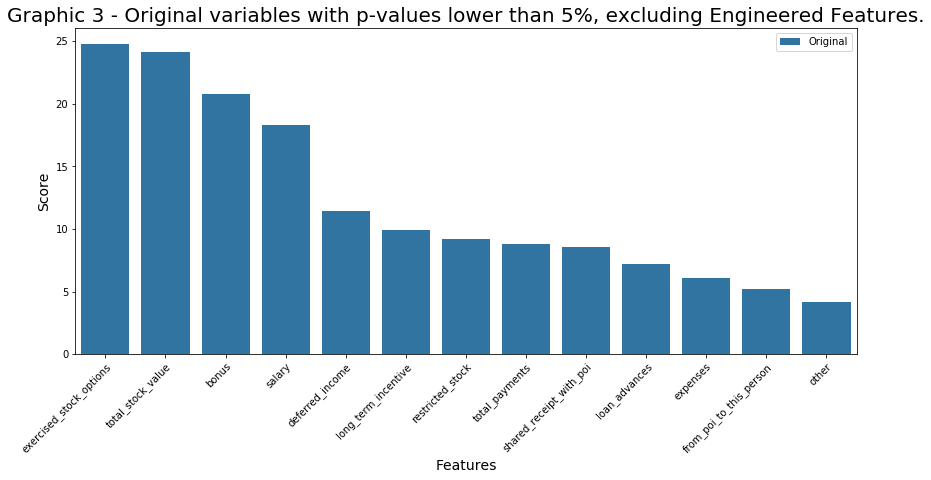

In [49]:
# Adding the hue to be comparable to the next graphic.
feat_sel_results['hue'] = 'Original'

# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results.query('p_values < 0.05').feature,
                 y = feat_sel_results.query('p_values < 0.05').scores,
                 hue = feat_sel_results.hue);
plt.title('Graphic 3 - Original variables with p-values lower than 5%, excluding Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

Assuming the $\alpha$ equal to 0.05, there are 13 features with p-values lower than $\alpha$, which means there are relevancy to the model.


I have not aggregated the features engineered.

In [50]:
# Adding to the original_feat list the engineered features.
complete_feat = original_feat + engineered_features

# Printing.
complete_feat

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'ratio_from_poi',
 'ratio_to_poi',
 'ratio_to_from',
 'ratio_from_poi_share',
 'ratio_salary_total_payments']

In [51]:
# Creating the label vector and features dataframe.
lab_example, feat_example = wrapper_featureformatsplit(my_dataset = my_dataset, features_list = complete_feat)

# Using the function feat_selection() and show the first 5 best scored variables.
feat_sel_results_complete = feat_selection(k = 5, feat = feat_example, lab = lab_example, feat_list = complete_feat)

# Printing.
feat_sel_results_complete.query('p_values < 0.05')

,feature,scores,p_values
4,exercised_stock_options,24.815080,0.000002
18,total_stock_value,24.182899,0.000002
0,bonus,20.792252,0.000011
14,salary,18.289684,0.000035
2,deferred_income,11.458477,0.000922
10,long_term_incentive,9.922186,0.001994
12,restricted_stock,9.212811,0.002863
17,total_payments,8.772778,0.003589
15,shared_receipt_with_poi,8.589421,0.003946
9,loan_advances,7.184056,0.008232


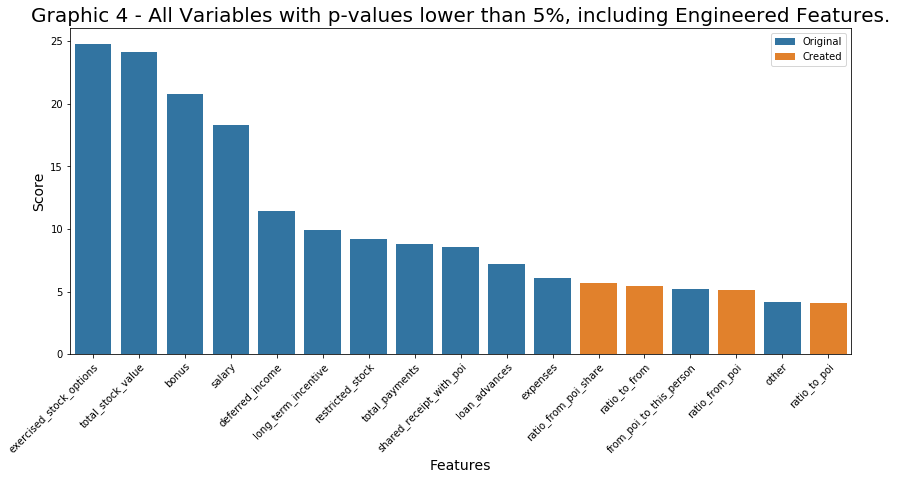

In [52]:
# Adding a new columns to use as hue in the graphic.

# Temporaly variable only to store if this is a feature engineered or not.
my_hue = []

# Loop to check it.
for feat_name in feat_sel_results_complete.feature:
    if feat_name in engineered_features:
        my_hue.append('Created')
    else:
        my_hue.append('Original')

feat_sel_results_complete['hue'] = my_hue
        
# Ploting the graphic.
plt.figure(figsize = [14, 6])
ax = sns.barplot(x = feat_sel_results_complete.query('p_values < 0.05').feature,
                 y = feat_sel_results_complete.query('p_values < 0.05').scores,
                 hue = feat_sel_results_complete.hue, dodge = False);
plt.title('Graphic 4 - All Variables with p-values lower than 5%, including Engineered Features.', fontsize = 20)
plt.ylabel('Score', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.legend();
plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
         ha="right", rotation_mode="anchor")
plt.show()

As you can see, there are very strong varibles to consider in the model, and the engineered features do not have a good performance, but let's give a try using the to predict.

In [53]:
# Saving the lists of features.
features_significant_original = feat_sel_results.query('p_values < 0.05').feature.tolist()
features_significant_complete = feat_sel_results_complete.query('p_values < 0.05').feature.tolist()

Let's plot the correlation map for the `features_significant_original`.

In [54]:
# Creating a function to calculate the correlation between variables.
def calc_correlation(df, feat_list):
    """
    """
    # Temporaly variable. List to store the columns values.
    temp = []

    # Loop to subset the dataframe.
    for index in feat_list:
        temp.append(df[index])

    # Correlation Calculation.
    return pd.DataFrame(np.corrcoef(temp), columns = feat_list, index = feat_list)

In [55]:
# Creating a function to plot a heatmap.
def heatmap(df_corr):
    """
    """
    plt.figure(figsize = [8,6])                  # Graph/Figure size
    ax = sns.heatmap(df_corr, linewidth=0.5)     # Heatmap
    ax.set_xticklabels(df_corr.index)            # X ticks labels
    ax.set_yticklabels(df_corr.columns)          # Y ticks labels
    plt.setp(ax.get_xticklabels(), rotation=45,  # 45 degrees labels on X axis
             ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=0,   # 0 degree labels on Y axis
             ha="right", rotation_mode="anchor")
    plt.show()

Although this is not a requirement of this project, I feel necessity to plot the correlation between features. Just to understand a bit more about the correlation of the variables. I am afraid about adding too many variables and consequently add colinearity.

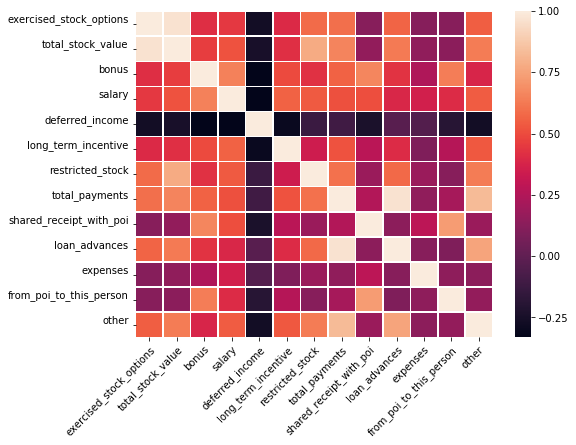

In [56]:
# Priting the heatmap.
heatmap(calc_correlation(df_eda, feat_list = features_significant_original))

As you can see, there are variables with high correlation such as:

* `total_stock_value` and `total_payments`;
* `shared_receipt_with_poi` and `from_poi_to_this_person.`, and;
* `deferred_income`which do not have any relationship with any variable.

#### 3.4.1. Evaluating the Classifiers

Let's evaluate the lists of features `features_significant_original`, `features_significant_complete`, and others using standards configuration of several classifiers.

The reason to do it is to make a sensible analysis of features selected to the final model.

In [57]:
# Adding the 'poi' in the list and adding as first element as preconized by the code.
features_significant_original = ['poi'] + features_significant_original
features_significant_complete = ['poi'] + features_significant_complete

I have created a function to bundle code lines because it could be repeativily.

In [58]:
# Function to create the dataset of features according to the features selected.
def create_traintest(my_data_dict, feat_list):
    """
    This function apply the function wrapper_featureformatsplit to create the
    labels vector and features matrix, then scale it and finally create the training
    and testing dataframes.
    """
    from sklearn.model_selection import train_test_split
    
    # Create the Labels vector and Features Matrix.
    lab, feat = wrapper_featureformatsplit(my_dataset = my_data_dict, features_list = feat_list)
    
    # Scaling the Feature Matrix due to the extreme values.
    #feat = feat_scale(feat)
    
    # Spliting the data into training and testing.
    features_train, features_test, labels_train, labels_test = train_test_split(feat, lab, test_size=0.3, random_state=42)
    
    # Returning a list.
    return features_train, features_test, labels_train, labels_test

Unfortunately, I have to antecipate the classifier construction from the Predict chapter to this point of the code. This function is a straightforward way to evaluate each list of selected features.

In [59]:
def select_fit_evaluate(classifier, train_test_data):
    """
    """
    # Unzipping the list from the create_traintest funciton.
    feat_train, feat_test, lab_train, lab_test = train_test_data
    
    # List of Classifier and parameters.
    list_class = {'ada':('ada', AdaBoostClassifier(n_estimators=100)),
                  'svc':('svc', SVC(gamma='auto')),
                  'tree':('tree', tree.DecisionTreeClassifier()),
                  'gauss':('gauss', GaussianNB()),
                  'knn':('knn', KNeighborsClassifier(n_neighbors=5)),
                  'random':('rand', RandomForestClassifier(n_estimators = 100))}
    
    # Creating the Pipeline.
    pipeline_ = Pipeline([list_class[classifier]])
    
    # Fitting.
    pipeline_.fit(feat_train,lab_train)

    # Predicting.
    pred_t = pipeline_.predict(feat_test)
    
    # Calculating the accuracy.
    acc = accuracy_score(lab_test, pred_t)
    
    # Calculating the recall. It is an array of (recall non-POI, recall POI)
    recall = recall_score(y_true = lab_test, y_pred = pred_t, average = None)

    # Calculating the precision. It is an array of (precision non-POI, precision POI)
    precision = precision_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Return the accuracy.
    return acc, recall.tolist(), precision.tolist()

So far I have created 4 lists of features.

In [60]:
# All list I have created so far.
all_list = [original_feat, complete_feat, features_significant_original, features_significant_complete]

The follow function will create a table of comparison of a given list of features.

In [61]:
# Creates a table of comparison.
def comparison_metrics(classifier, list_of_list):
    # Temporaly variables to store the values of accuracy, recall and precision.
    acc = [] # Accuracy
    recall = [] # recall from poi and non-poi
    precision = [] # precision from poi and non-poi

    # Loop to calculate for each list of features the accuracy, precision and recall.
    for index in list_of_list:
        # Unloading the values calculated by select_fit_evaluate function. 
        i_acc, i_recall, i_precision = select_fit_evaluate(classifier = classifier,
                                                           train_test_data = create_traintest(my_dataset,
                                                                                              feat_list = index))
        # Appending the values in the list.
        acc.append(i_acc)
        recall.append(i_recall)
        precision.append(i_precision)

    # Converting to DataFrame.
    acc = pd.DataFrame(acc, columns = ['accuracy'])
    recall = pd.DataFrame(recall, columns = ['recall_non_poi','recal_poi'])
    precision = pd.DataFrame(precision, columns = ['precision_non_poi','precision_poi'])

    # Merging.
    comparison = acc.join(recall).join(precision)

    # Renaming the rows.
    comparison.index = ['original_feat','complete_feat','features_significant_original','features_significant_complete']

    # Printing the results.
    return comparison

Let's compare using different algorithms classifiers.

### Task 4 - Try a varity of classifiers <a id='task4'></a>

>**Try a varity of classifiers**

In [62]:
comparison_metrics(classifier = 'gauss', list_of_list = all_list)

,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,0.947368,0.4,0.923077,0.5
complete_feat,0.883721,0.947368,0.4,0.923077,0.5
features_significant_original,0.860465,0.921053,0.4,0.921053,0.4
features_significant_complete,0.860465,0.921053,0.4,0.921053,0.4


In [63]:
comparison_metrics(classifier = 'random', list_of_list = all_list)

,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.906977,1.000000,0.2,0.904762,1.0
complete_feat,0.930233,1.000000,0.4,0.926829,1.0
features_significant_original,0.883721,0.973684,0.2,0.902439,0.5
features_significant_complete,0.906977,1.000000,0.2,0.904762,1.0


In [64]:
comparison_metrics(classifier = 'ada', list_of_list = all_list)

,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.813953,0.894737,0.2,0.894737,0.200000
complete_feat,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_original,0.860465,0.947368,0.2,0.900000,0.333333
features_significant_complete,0.837209,0.921053,0.2,0.897436,0.250000


In [65]:
comparison_metrics(classifier = 'tree', list_of_list = all_list)

,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.860465,0.947368,0.2,0.900000,0.333333
complete_feat,0.813953,0.921053,0.0,0.875000,0.000000
features_significant_original,0.813953,0.894737,0.2,0.894737,0.200000
features_significant_complete,0.813953,0.894737,0.2,0.894737,0.200000


In [66]:
comparison_metrics(classifier = 'knn', list_of_list = all_list)

C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,1.0,0.0,0.883721,0.0
complete_feat,0.883721,1.0,0.0,0.883721,0.0
features_significant_original,0.883721,1.0,0.0,0.883721,0.0
features_significant_complete,0.883721,1.0,0.0,0.883721,0.0


In [67]:
comparison_metrics(classifier = 'svc', list_of_list = all_list)

C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python27\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,accuracy,recall_non_poi,recal_poi,precision_non_poi,precision_poi
original_feat,0.883721,1.0,0.0,0.883721,0.0
complete_feat,0.883721,1.0,0.0,0.883721,0.0
features_significant_original,0.883721,1.0,0.0,0.883721,0.0
features_significant_complete,0.883721,1.0,0.0,0.883721,0.0


Without any tunning the Gauss, AdaBoost, and Random Forest are performed the better results.

The `original_feat` and `complete_feat` are calculated only as reference to the `features_significant_original` and `features_significant_complete`.

Have in mind, from the lists `features_significant_original` and `features_significant_complete`, I will refine the right number of features to use for further study, because both list have only features with statistical significance. Recall, the combination possible using or not each features:

* `features_significant_original` has 14 features, which means 16,384 combinations, and;
* `features_significant_complete` has 18 features, which means 262,144 combinations.

Clearly, it is possible to find the global optimal due to the few number of combinations, but I will use a different approach using a Multiobjective Genetic Algorithm.

#### 3.4.1. Algorithm to Select the Features

In [68]:
metrics = ['accuracy', 'precision_non_poi', 'precision_poi', 'recall_non_poi', 'recall_poi', 'qty_features']

In [69]:
def individual(genes):
    """
    This function creates a vector that minetizes the cromossome, each
    gene is a feature selected (1: selected, 0: not selected).
    """
    return np.random.choice([0, 1], genes, 0.5)

In [70]:
def population(n, genes):
    """
    This functions creates a population using several times the individual() function.
    """
    df = []

    for index in range(0,n):
        df.append(individual(genes))
    
    return pd.DataFrame(df).transpose()

In [71]:
def crossing_over(ind_1, ind_2):
    """
    
    """
    cross = np.random.choice(range(1,len(ind_1)),1)

    crossed_1 = ind_1[:cross[0]] + ind_2[cross[0]:]
    crossed_2 = ind_2[:cross[0]] + ind_1[cross[0]:]
    
    return pd.DataFrame([crossed_1, crossed_2], index = ['crossed_1', 'crossed_2']).transpose()

In [72]:
def random_picker(df, n):
    """
    This function will be used to random draw individuals from the current population.
    """
    return df.sample(n, axis = 1)

In [73]:
def reproduction(df, n):
    """
    This function control the reproduction given a random_picker population.
    """
    temp = pd.DataFrame()

    for index in range(0, n+1):
        draw_individual = random_picker(df, 2)
        new_individuals = crossing_over(draw_individual.iloc[:,0].tolist(),
                                        draw_individual.iloc[:,1].tolist())
        if index == 1:
            temp = new_individuals
            temp.columns = range(0, temp.shape[1])
        else:
            temp = temp.join(new_individuals)
            temp.columns = range(0, temp.shape[1])
    
    # Renaming to avoid problem with joining.
    temp.columns = map(lambda x : 'x' + str(x), temp.columns)
    
    return temp

In [74]:
def mutation_gene(ind):
    """
    This function perform the gene mutation.
    """
    gen = np.random.choice(range(0,len(ind)),1)

    if ind[gen[0]] == 0:
        ind[gen[0]] = 1
    else:
        ind[gen[0]] = 0

    return ind

In [75]:
def mutation_pop(pop_to_mutate):
    """
    This function creates the mutates person from the given population.
    """
    
    temp = []

    for index in pop_to_mutate:
        temp.append(mutation_gene(pop_to_mutate.loc[:,index].tolist()))

    temp = pd.DataFrame(temp).transpose()

    temp.columns = map(lambda x : 'm' + str(x), temp.columns)

    return temp

In [76]:
def cost_function(df, list_feat):
    """
    """
    # Reseting the index.
    df.columns = range(0, df.shape[1])
    
    # Dictionary to store temporaly data.
    my_test_dict = {}

    # Loop: For each column I will use to "filter" my features.
    for value in df.columns:
        # Converting 0/1 vector in boolean.
        select = df.iloc[:,value].astype(bool).tolist()

        # Removing the first element. POI
        work_list = list_feat[1:] 

        # Converting to DataFrame to easy the use.
        work_list_df = pd.DataFrame(work_list, columns = ['feat'])

        # Selecting the desired features and adding the 'poi' feature.
        work_list_updated = ['poi'] + work_list_df[select].feat.tolist()

        # Calculating the values of accuracy, recall, and precision.
        acc, recall, precision = select_fit_evaluate('gauss', create_traintest(my_dataset, feat_list = work_list_updated))

        # Unloading the list.
        #print "recall:", recall
        recall_non_poi, recall_poi = recall
        
        #print "precision:", precision
        precision_non_poi, precision_poi = precision

        # Adding values to a dictionary.
        my_test_dict[value] = {'accuracy':acc,
                               'recall_non_poi':recall_non_poi,
                               'recall_poi':recall_poi,
                               'precision_non_poi':precision_non_poi,
                               'precision_poi':precision_poi}

    # Returning as DataFrame.
    return pd.DataFrame(my_test_dict).transpose()

In [77]:
def dominance_observation(df,row, metrics = metrics):
    """
    """
    # Counter to keep track the for.
    counter = 0

    # Comparison: Greater or not.
    results = []

    # Metrics in my dafatframe.
    #metrics = ['accuracy', 'precision_non_poi', 'precision_poi', 'recall_non_poi', 'recall_poi']

    # Loop to compare each observation with all features.
    for feat in metrics:
        if counter == 0:
            results = (df[feat] >= df[feat][row])
        else:
            results = results & (df[feat] >= df[feat][row])
        
        counter += 1
        
    return sum(results.tolist())

In [78]:
def qty_features(df, pop, list_feat):
    """
    """
    # Temporaly variable to store the number of features by observation.
    qty_feat = []

    # Loop to calculate each number of features.
    for i in pop.columns:
        # Insert value in a list.
        qty_feat.append(len(list_feat) - 1 - int(sum(pop.loc[:,i])))

    # Adding a new column.
    df['qty_features'] = qty_feat
    
    return df

In [79]:
#qty_features(df_metrics_final, pop_final, features_significant_original)

In [80]:
def dominancy(df):
    """
    """
    
    # Temporaly variable to store the dominancies values of each individual.
    dom = []
    
    # Loop to calculate the dominance.
    for row in df.index:
        
        # Appending the dominance to a list.
        dom.append(dominance_observation(df,row))
    
    # Adding a new column called dominancy and assign it the dominace values.
    df['dominancy'] = dom
    
    return df

In [81]:
def elitism(df, df_pop, elitism_level = 50, pop_size = 200):
    """
    This functions aims to select the dominant frontiers defined by elitism_level.
    """
    # If the filter is too much restrict.
    if df.query('dominancy < {}'.format(elitism_level)).shape[0] < pop_size:
        
        df_elit = df.sort_values('dominancy')[:pop_size]
    
        df_non_elit = df.sort_values('dominancy')[pop_size:]
    
    else:
        
        # Filtering the elitism_level. ATENTION: METRICS not POPULATION.
        df_elit = df.query('dominancy < {}'.format(elitism_level))
    
        # Filtering the non elitims.
        df_non_elit = df.query('dominancy >= {}'.format(elitism_level))

    # Gathering the index to filter the population.
    elit = df_elit.index

    # Filtering the population using the elit vector.
    pop_elit = df_pop.loc[:,elit]

    # Returning 3 dataframes. 1) Elitism, 2) Non-elitism, 3) Elit Population.
    return df_elit, df_non_elit, pop_elit        

In [82]:
def crow_dist_feat(df, feat):
    """
    """
    # Temporaly variable to store the values of crowding distance for a given feature feat.
    temp = []
    
    # Subsetting the given dataframe. I need to sort the dataframe.
    df_copy = df.sort_values(feat, ascending = False)

    # Counter to keep track the index of the dataframe.
    counter = 0

    # Loop "calculate" the crowding distance according to the conditions.
    for ind in df_copy.index:
        
        # Repeated higher values. If TRUE the boundary values are repeated.
        repeat_higher = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].max())
    
        # Repeated lower values. If TRUE the boundary values are repeated.
        repeat_lower = (df_copy.iloc[[counter]][feat].tolist()[0] == df_copy[feat].min())    
        
        # 1: First and last elements of the frontier always 10**9
        if (counter == 0) | (counter == len(df_copy.index)):
            temp.append(1000000000)
        
        else:
            if repeat_higher | repeat_lower:
                temp.append(1000000000)
            else:
                numerator = df_copy.iloc[[counter - 1]][feat].tolist()[0] - df_copy.iloc[[counter + 1]][feat].tolist()[0]
                denominator = df_copy[feat].max() - df_copy[feat].min()
                temp.append(numerator/float(denominator))
        
        # Updating the counter
        counter += 1
    
    # Adding the crowding distance for one varible to the dataframe. I want the index.
    df_copy['crow_dist'] = temp
    
    # Sorting by index to return.
    df_copy = df_copy.sort_index()
    
    # Returning only indexes and crowding distance for one variable.
    return df_copy[['crow_dist']]

In [83]:
def crow_dist_frontier(df, feat):
    """
    """
    
    counter = 0

    lista_nova = []

    for i in df.dominancy.unique().tolist():
        if counter == 0:
            lista_nova = crow_dist_feat(df.query('dominancy == {}'.format(i)), feat)
        else:
            lista_nova = lista_nova.append(crow_dist_feat(df.query('dominancy == {}'.format(i)), feat))

        counter += 1

    return lista_nova.sort_index()

In [84]:
def crowding_distance(df, metrics = metrics):
    """
    """
    counter = 0
    
    df['crow_dist'] = 0
    
    #metrics = ['accuracy' ,'precision_non_poi' ,'precision_poi' ,'recall_non_poi' ,'recall_poi']
    
    for metric in metrics:
        if counter == 0:
            df['crow_dist'] = crow_dist_frontier(df, metric)
        else:
            df['crow_dist'] = df[['crow_dist']] + crow_dist_frontier(df, metric)
        
        counter += 1
    
    return df

In [85]:
def choose_parents(parent, population):
    """
    This function choose the crossing over mother/father.
    Criterias to select:
       1. Lowest Dominacy
       2. Highest Crowding Distance
    """
    # Situations
    
    # 1. When both individuals have the same dominance.
    parents_equal_dominance = parent['dominancy'].tolist()[0] == parent['dominancy'].tolist()[1]
    
    # 2. When both individuals have the same crowding distance 
    parents_equal_crowding_distance = parent['crow_dist'].tolist()[0] == parent['crow_dist'].tolist()[1]

    # First criteria to select the winner is dominance.
    # If the dominance is equal.
    if parents_equal_dominance:
        # Second criteria to select the winner is crowding distance.
        # If the crowding distance is equal.
        if parents_equal_crowding_distance:
            # If both dominance and crowding distance are equal. Random choice.
            mother = np.random.choice(parent.index.tolist(), 1).tolist()[0]
        else:
            # Winner = Highest crowding distance.
            mother = parent[['crow_dist']].sort_values('crow_dist', ascending = False).index[0]
    else:
        # Winner = Lowest dominance
        mother = parent[['dominancy']].sort_values('dominancy').index[0]
    
    # Return the winner.
    return population.loc[:,[mother]]

In [86]:
def tournament(df, population):
    """
    
    """
    # Random draw of 4 postulants to be father/mother
    pool = df.sample(4, axis = 0)

    # Selecting the first 2 lines as first combat (tournament).
    combat_1 = pool.iloc[:2]
    
    # The function choose_parents select the winner. 
    parente_1 = choose_parents(combat_1, population)

    # Selecting the last 2 lines as second combat (tournament).
    combat_2 = pool.iloc[2:]
    
    # The function choose_parents select the winner.
    parente_2 = choose_parents(combat_2, population)
    
    # Creating a DataFrame to return it.
    parente_1[str(parente_2.columns[0])] = parente_2

    return parente_1

In [87]:
def reproduction_v2(df, population, n):
    """
    This function control the reproduction given a tournament.
    """
    temp = pd.DataFrame()

    for index in range(0, n+1):
        draw_individual = tournament(df, population)
        new_individuals = crossing_over(draw_individual.iloc[:,0].tolist(),
                                        draw_individual.iloc[:,1].tolist())
        if index == 1:
            temp = new_individuals
            temp.columns = range(0, temp.shape[1])
        else:
            temp = temp.join(new_individuals)
            temp.columns = range(0, temp.shape[1])
    
    # Renaming to avoid problem with joining.
    temp.columns = map(lambda x : 'x' + str(x), temp.columns)
    
    return temp

In [88]:
def rm_duplicated(df, pop):
    """
    """
    # Selection vector. I will use it to select the duplicated individuals.
    selection = pop.T.duplicated()
    print "Duplicated cromossomes:", sum(selection)

    # Dropping the Duplicated.
    pop = pop.T[np.logical_not(selection)].T

    # Removing the same individuals from df_metrics.
    df = df.loc[pop.T.index]
    
    return df, pop

In [89]:
def NSGA2(generation, pop_size, feat_list, mutation_rate = 0.1):
    """
    """
    import warnings
    warnings.filterwarnings("ignore")

    import time
    
    # Keep the time elapse.
    t0 = time.time()
    
    # Counter to coount the number of generations.
    counter = 0
    
    # Number of Cromossomes to be mutate.
    x_rate = pop_size * mutation_rate

    print "=========== Initializing the Population ==========="
    
    # Initial Population
    pop_work = population(pop_size, len(feat_list) - 1)
    print "Population Size:", pop_work.shape[1]

    # Calculating the accuracy, recall, and precision
    print "Calculating Accuracy, Precision, and Recall."
    df_metrics = cost_function(pop_work, feat_list)

    # Number of Features.
    df_metrics = qty_features(df_metrics, pop_work, features_significant_original)
    
    # Calculating the Dominance.
    print "Calculating Dominancy."
    df_metrics = dominancy(df_metrics)

    # Calculating the Crowding Distance.
    print "Calculating Crowding Distance."
    df_metrics = crowding_distance(df_metrics)

    print "\n============== Aging the Population ==============="
        
    while(counter <= generation):
        
        print "\nGeneration:", counter
        print "----------"
        
        # Number of offspring to reach 2N (2 * pop_size)
        offspring = (2 * pop_size  - df_metrics.shape[0])/2
                
        # Crossing Over.
        pop_work = pop_work.join(reproduction_v2(df_metrics,pop_work, offspring))
        print "Population after Crossing Over:", pop_work.shape[1]

        # Mutation
        pop_work = pop_work.join(mutation_pop(random_picker(pop_work, int(x_rate) )))
        print "Population after Mutation:", pop_work.shape[1]
        
        # Calculating the accuracy, recall, and precision
        print "Calculating Accuracy, Precision, and Recall."
        df_metrics = cost_function(pop_work, features_significant_original)
        
        # Number of Features.
        df_metrics = qty_features(df_metrics, pop_work, features_significant_original)     
        
        # Calculating the Dominancy.
        print "Calculating Dominancy."
        df_metrics = dominancy(df_metrics)
        
        # Calculating the Crowding Distance.
        print "Calculating Crowding Distance."
        df_metrics = crowding_distance(df_metrics)

        # Removing duplicated
        df_metrics, pop_work = rm_duplicated(df_metrics, pop_work)
        print "Removing Duplicated Cromossomes."
        
        # Elitism
        print "Filtering using Elitism."
        df_metrics, _, pop_work = elitism(df_metrics, pop_work, 30, pop_size)
        
        print "Population after Elitism and removing duplicated:", pop_work.shape[1]

        # Update counter.
        counter += 1
    
    print "\n=================== FINISH! ======================="
    
    print "\n\nDuration:", round((time.time() - t0)/60, 2), "minutes"
    
    return df_metrics, pop_work

In [94]:
np.random.seed(42)

df_metrics_final, pop_final = NSGA2(5, 500, features_significant_original, 0.2)

=========== Initializing the Population ===========
Population Size: 500
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.

============== Aging the Population ===============

Generation: 0
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated cromossomes: 132
Removing Duplicated Cromossomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 1
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating Accuracy, Precision, and Recall.
Calculating Dominancy.
Calculating Crowding Distance.
Duplicated cromossomes: 214
Removing Duplicated Cromossomes.
Filtering using Elitism.
Population after Elitism and removing duplicated: 500

Generation: 2
----------
Population after Crossing Over: 1000
Population after Mutation: 1100
Calculating 

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df_metrics_final.sort_values('dominancy').query('dominancy == 2')

In [ ]:
dominancy(df_metrics_final).head()

In [ ]:
df_metrics_final.iloc[1] == df_metrics_final.iloc[0]

In [ ]:
plt.figure(figsize = [14,6])
sns.scatterplot(x = df_metrics_final.precision_poi,
                y = df_metrics_final.recall_poi,
                hue = df_metrics_final.dominancy)

In [ ]:
df_metrics_final.sort_values('dominancy').head()

In [ ]:
qty_feat = []

for i in pop_final.columns:
    qty_feat.append(int(sum(pop_final.loc[:,i])))
    
df_metrics_final['qty_features'] = qty_feat

In [ ]:
df_metrics_final

In [ ]:
df_metrics_final

In [ ]:
    # Initial Population
pop_work = population(400, len(features_significant_original) - 1)

    # Calculating the accuracy, recall, and precision
df_metrics = cost_function(pop_work, features_significant_original)


df_metrics = qty_features(df_metrics, pop_work)

    # Calculating the Dominance.
df_metrics_g1 = dominancy(df_metrics)

    # Calculating the Crowding Distance.
df_metrics_g1 = crowding_distance(df_metrics_g1)

In [ ]:
df_metrics_g1

In [ ]:
pca = PCA(n_components=2)
cc = pca.fit_transform(bb);

cc = pd.DataFrame(cc, columns = ['pca_1','pca_2'])

plt.scatter(x = cc.pca_1, y = cc.pca_2)

### 3.5. Dimension Reduction <a id='pca'></a>


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
len(features[0])

In [ ]:
pca = PCA(n_components=2)
pca.fit(features);

#pd.DataFrame([pca.components_[0],pca.components_[1]], index = ['first_component','second_component'], columns = features_list[1:]).transpose()

pd.DataFrame(pca.components_).transpose()

### 3.6. Piping

In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
pipeline = Pipeline([('gauss',GaussianNB())])

pipeline.fit(features_train,labels_train)

pred = pipeline.predict(features_test)

accuracy_score(labels_test, pred)

In [ ]:
pipeline2 = Pipeline([('tre',tree.DecisionTreeClassifier())])

pipeline2.fit(features_train,labels_train)

pred2 = pipeline2.predict(features_test)

accuracy_score(labels_test, pred2)

In [ ]:
pipeline3 = Pipeline([('svc',SVC(gamma='auto'))])

pipeline3.fit(features_train,labels_train)

pred3 = pipeline3.predict(features_test)

accuracy_score(labels_test, pred3)

In [ ]:
pipeline4 = Pipeline([('ada',AdaBoostClassifier(n_estimators=100))])

pipeline4.fit(features_train,labels_train)

pred4 = pipeline4.predict(features_test)

accuracy_score(labels_test, pred4)

In [ ]:
select_fit_evaluate(classifier = 'gauss',
                    train_test_data = create_traintest(my_dataset,
                                                       feat_list = features_significant_complete))

In [ ]:
select_fit_evaluate(classifier = 'gauss',
                    train_test_data = create_traintest(my_dataset,
                                                       feat_list = original_featall_feat))

In [ ]:
features_significant_complete

In [ ]:
def select_fit_evaluate(classifier, train_test_data):
    """
    """
    feat_train, feat_test, lab_train, lab_test = train_test_data
    
    # List of Classifier and parameters.
    list_class = {'ada':('ada',AdaBoostClassifier(n_estimators=100)),
                  'svc':('svc',SVC(gamma='auto')),
                  'tree':('tree',tree.DecisionTreeClassifier()),
                  'gauss':('gauss',GaussianNB())
                 }
    
    # Creating the Pipeline.
    pipeline_ = Pipeline([list_class[classifier]])
    
    # Fitting.
    pipeline_.fit(feat_train,lab_train)

    # Predicting.
    pred_t = pipeline_.predict(feat_test)

    # Calculating the accuracy.
    acc = accuracy_score(lab_test, pred_t)
    
    # Calculating the recall. It is an array of (recall non-POI, recall POI)
    recall = recall_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Calculating the precision. It is an array of (precision non-POI, precision POI)
    precision = precision_score(y_true = lab_test, y_pred = pred_t, average = None)
    
    # Return the accuracy.
    return acc, recall.tolist(), precision.tolist()

In [ ]:
select_fit_evaluate(classifier = 'ada',
            feat_train = features_train,
            lab_train = labels_train,
            feat_test = features_test,
            lab_test = labels_test)

In [ ]:
minha_linda_lista = ['ada','svc','gauss','tree']

for index in minha_linda_lista:
    print select_fit_evaluate(classifier = index,
            feat_train = features_train,
            lab_train = labels_train,
            feat_test = features_test,
            lab_test = labels_test)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true = labels_test, y_pred = pred)

In [ ]:
#pipeline = Pipeline([('gauss',GaussianNB())])
pipeline = Pipeline([('tre',tree.DecisionTreeClassifier())])



pipeline.fit(features_train,labels_train)

pred4 = pipeline.predict(features_test)

acc = accuracy_score(labels_test, pred4)

recall = recall_score(y_true = labels_test, y_pred = pred4)
    
precision = precision_score(y_true = labels_test, y_pred = pred4)

tn, fp, fn, tp = confusion_matrix(labels_test, pred4).ravel()

acc, (recall, float(tp) / (tp + fn)), (precision, float(tp) / (tp + fp))

In [ ]:
confusion_matrix(y_true = labels_test, y_pred = pred4)

In [ ]:
recall_score(y_true = labels_test, y_pred = pred4, average = None)

In [ ]:
precision_score(y_true = labels_test, y_pred = pred4, average = None)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = labels_test, y_pred = pred4).ravel()

In [ ]:
# recall
float(tp) / (tp + fn)

In [ ]:
# precision
float(tp) / (tp + fp)

In [ ]:
sum(labels_test)

In [ ]:
bosta = pd.DataFrame([labels_test,pred4.tolist()], index = ['verdade','pred']).transpose()

In [ ]:
bosta.query('verdade == 0').query('pred == 0').count()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print classification_report(y_true = labels_test, y_pred = pred4)

# 4. Predicting <a id='ml'></a>


# 5. Conclusions <a id='conclusions'></a>


In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

print(clf_pf.predict([[-0.8, -1]]))

# 6. Questions <a id='questions'></a>


>1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

In [ ]:
ax = sns.heatmap(hola, linewidth=0.5)
ax.set_xticklabels(hola.index)
ax.set_yticklabels(hola.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
plt.show()

In [ ]:
teste = np.corrcoef([df_eda.bonus,
                     df_eda.salary,
                     df_eda.total_payments,
                     df_eda.total_stock_value,
                     df_eda.shared_receipt_with_poi,
                     df_eda.to_messages,
                     df_eda.from_messages,
                     df_eda.from_this_person_to_poi,
                     df_eda.from_poi_to_this_person])

In [ ]:
ax = sns.heatmap(teste, linewidth=0.5)
ax.set_xticklabels(['bonus','salary','total_payments','total_stock_value',
                    'shared_receipt_with_poi','to_messages','from_messages',
                    'from_this_person_to_poi','from_poi_to_this_person'])
ax.set_yticklabels(['bonus','salary','total_payments','total_stock_value',
                    'shared_receipt_with_poi','to_messages','from_messages',
                    'from_this_person_to_poi','from_poi_to_this_person'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
plt.show()

>2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]


>3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  [relevant rubric item: “pick an algorithm”]

>4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]


In [ ]:
features_list2 = ['poi',
 'total_payments',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'from_messages',
 'to_messages','salary','ratio_from_poi','ratio_to_poi','ratio_to_from','ratio_from_poi_share','bonus',
                'other','director_fees','expenses','long_term_incentive','exercised_stock_options']

In [ ]:
# Using the defined wrapper_feat_form_split function.
labels2, features2 = wrapper_feat_form_split(my_dataset, features_list2)

# Scaling the features dataframe.
features2 = feat_scale(feat = features2)

# Using the function feat_selection().
feat_selection(k = 'all', feat = features2, lab = labels2, features_list = features_list2)[0]

>5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]


>6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]


***

# References <a id='references'></a>



* Feature Selection using LASSO [PDF][ref_01];
* Feature selection for “final” model when performing cross-validation in machine learning, Cross Validation thread, [website][ref_02];
* Perform feature normalization before or within model validation?, Cross Validation thread, [website][ref_03];
* Right order of doing feature selection, PCA and normalization?, Stack Overflow thread, [website][ref_04];
* How does SelectKBest work?, Stack Exchange thread, [website][ref_05];
* What's the meaning of p-values which produced by feature selection (i.e. chi2 method)?, Stack Overflow thread, [website][ref_06];
* Batista, D. S., Hyperparameter optimization across multiple models in scikit-learn, Blog, [website][ref_07];
* Faces recognition example using eigenfaces and SVMs, Scikit Learn Documentation, Example, [website][ref_08]; 
* Precision and Recall, Scikit Learn Documentation, [website][ref_09];
* Add new keys to a dictionary?, Stack Overflow thread, [website][ref_10];


[ref_01]: https://beta.vu.nl/nl/Images/werkstuk-fonti_tcm235-836234.pdf
[ref_02]: https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine
[ref_03]: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation
[ref_04]: https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization
[ref_05]: https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
[ref_06]: https://stackoverflow.com/questions/23677734/whats-the-meaning-of-p-values-which-produced-by-feature-selection-i-e-chi2-me
[ref_07]: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
[ref_08]: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
[ref_09]: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
[ref_10]: https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary


##### Scikit Learn

* F1 Score, [Website][scikit_learn_f1_score];
* Selected k Best, [Website][scikit_learn_selectedkbest];
* Feature Selection Module, [Website][scikit_learn_feat_select]
* f_classif from Feature Selection module, [Website][scikit_learn_f_classif];
* Lasso, [Website][scikit_learn_lasso];
* MinMaxScaler, [Website][scikit_learn_minmaxscaler]
* Recall Score from Metrics, [Website][scikit_learn_recall] 
* Precision Score from Metrics, [Website][scikit_learn_precision] 



[scikit_learn_f1_score]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
[scikit_learn_selectedkbest]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
[scikit_learn_f_classif]: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif
[scikit_learn_lasso]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
[scikit_learn_feat_select]: https://scikit-learn.org/stable/modules/feature_selection.html
[scikit_learn_minmaxscaler]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
[scikit_learn_recall]:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
[scikit_learn_precision]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html


***

In [ ]:
%load_ext version_information
%version_information pandas, numpy, pickle, platform, version_information, sklearn

# Appendix <a id='appendix'></a>

## A.1. Given Code <a id='code'></a>

### A.1.1. `poi_id.py`

```py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)
```

In [ ]:
def choose_alg(alg):
    bit_3, bit_2, bit_1 = alg

    dec = 4 * bit_3 + 2 * bit_2 + 1 * bit_1

    dictionary_classifier = {'1': ['DT()','blabla'],
                             '2': ['Naive()','blabla']}
    return dictionary_classifier[str(1)]